<a href="https://colab.research.google.com/github/ExplorerGumel/UmojaHack-Africa-2022-Begineer-Challenge/blob/main/Umojahack22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer

train = pd.read_csv("/content/train.csv",parse_dates=['Datetime'])
test = pd.read_csv("/content/test.csv",parse_dates=['Datetime'])
ss = pd.read_csv("/content/SampleSubmission.csv")

train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


# Exploring the dataset

In [ ]:
train.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


In [ ]:
test.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
count,127361.000000,127361.000000,39271.000000,39271.000000
mean,42.795356,43.958427,23.683838,72.215834
std,27.838730,28.260335,3.725563,18.078569
min,1.230000,0.780000,16.900000,28.000000
25%,24.670000,25.580000,20.900000,58.000000
50%,39.770000,39.880000,22.500000,78.000000
75%,52.030000,52.830000,26.500000,88.000000
max,927.780000,894.750000,34.000000,97.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


[]

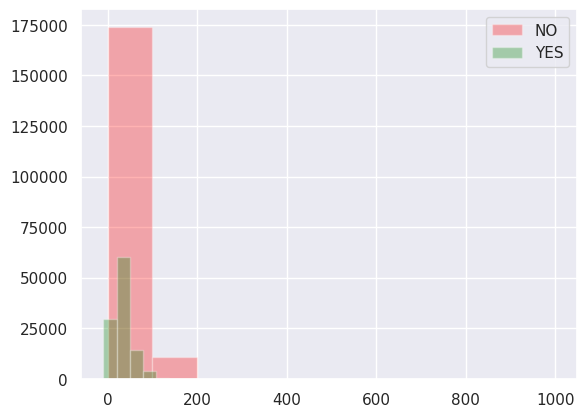

In [ ]:
sns.set()
plt.hist(train[train['Offset_fault'] == 0]['Sensor1_PM2.5'], color='red', alpha = 0.3, label = 'NO')
plt.hist(train[train['Offset_fault'] == 1]['Sensor1_PM2.5'], color='green', alpha=0.3, label = 'YES')
plt.legend()
plt.plot()

[]

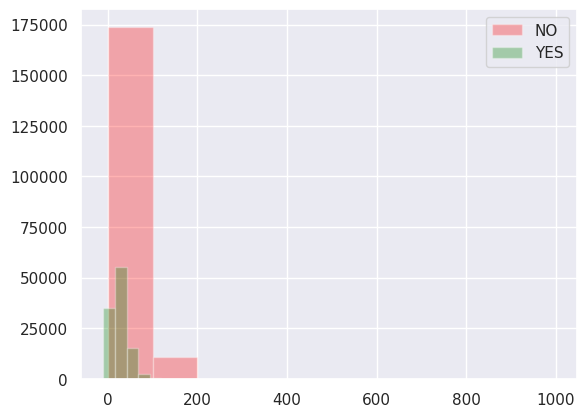

In [ ]:
sns.set()
plt.hist(train[train['Offset_fault'] == 0]['Sensor2_PM2.5'], color='red', alpha = 0.3, label = 'NO')
plt.hist(train[train['Offset_fault'] == 1]['Sensor2_PM2.5'], color='green', alpha=0.3, label = 'YES')
plt.legend()
plt.plot()

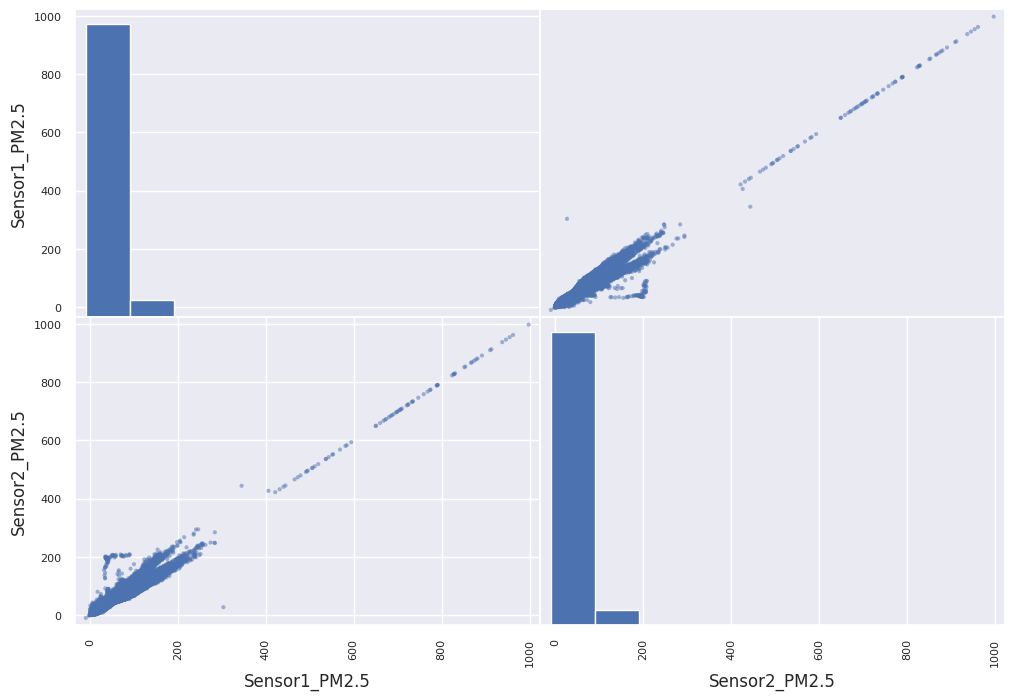

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Sensor1_PM2.5", "Sensor2_PM2.5"]
scatter_matrix(train[attributes], figsize=(12, 8));


In [ ]:
for dataset in (train,test):
    dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
    dataset['Datetime_day'] = dataset.Datetime.dt.day
    dataset['Datetime_month'] = dataset.Datetime.dt.month
    dataset['Datetime_year'] = dataset.Datetime.dt.year
    dataset['Datetime_hour'] = dataset.Datetime.dt.hour
    dataset['Datetime_minute'] = dataset.Datetime.dt.minute
    dataset['Datetime_seconds'] = dataset.Datetime.dt.second
    dataset['Datetime_day_of_year'] = dataset.Datetime.dt.dayofyear
    dataset['Datetime_day_of_week'] = dataset.Datetime.dt.dayofweek
    dataset['Datetime_week_of_year'] = dataset.Datetime.dt.weekofyear
    dataset.drop('Datetime',axis=1,inplace=True)

<ipython-input-7-97581461fbd2>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['Datetime_week_of_year'] = dataset.Datetime.dt.weekofyear
<ipython-input-7-97581461fbd2>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['Datetime_week_of_year'] = dataset.Datetime.dt.weekofyear


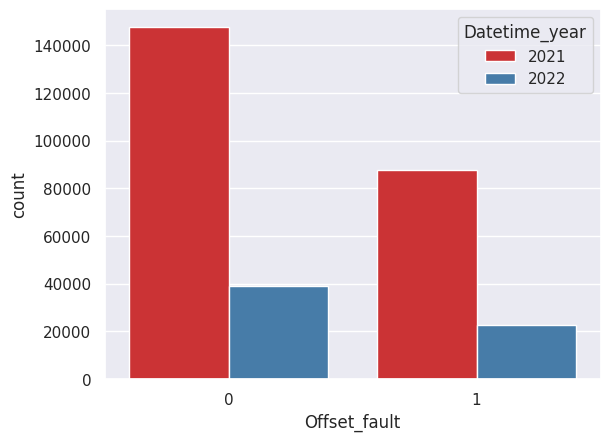

In [ ]:
sns.countplot( x='Offset_fault', data=train, hue="Datetime_year", palette="Set1");

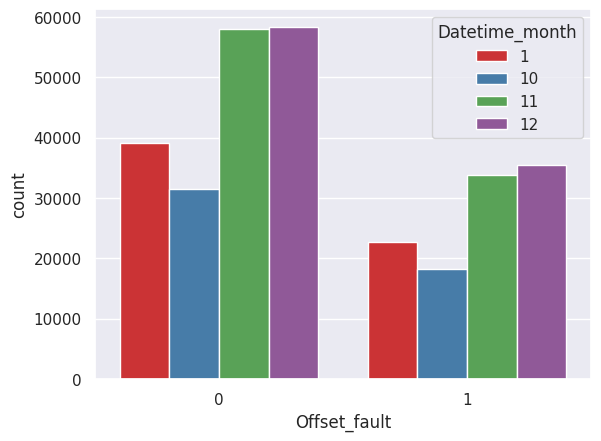

In [ ]:
sns.countplot( x='Offset_fault', data=train, hue="Datetime_month", palette="Set1");


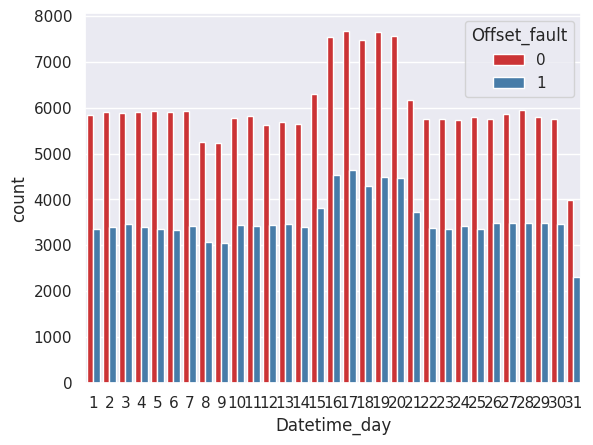

In [ ]:
sns.countplot( x='Datetime_day', data=train, hue="Offset_fault", palette="Set1");


[]

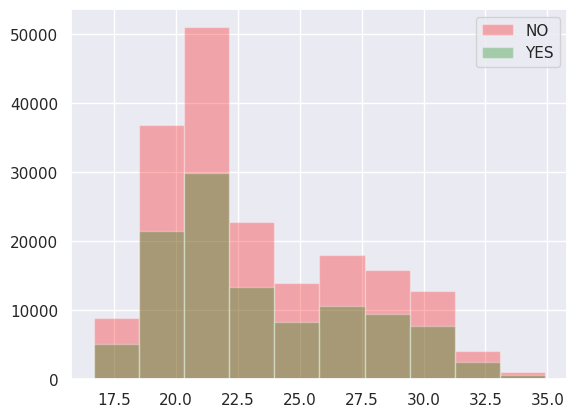

In [ ]:
sns.set()
plt.hist(train[train['Offset_fault'] == 0]['Temperature'], color='red', alpha = 0.3, label = 'NO')
plt.hist(train[train['Offset_fault'] == 1]['Temperature'], color='green', alpha=0.3, label = 'YES')
plt.legend()
plt.plot()

[]

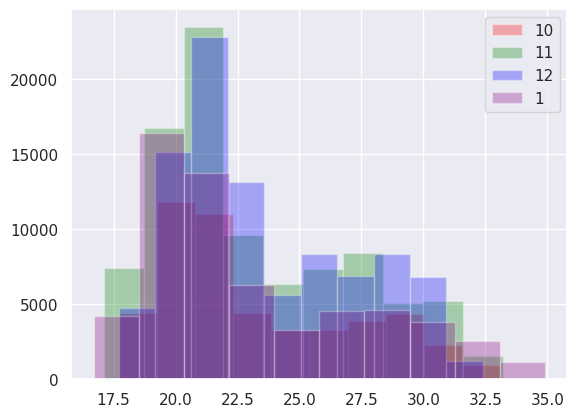

In [ ]:
sns.set()
plt.hist(train[train['Datetime_month'] == 10].Temperature, color='red', alpha = 0.3, label = 10)
plt.hist(train[train['Datetime_month'] == 11].Temperature, color='green', alpha=0.3, label = 11)
plt.hist(train[train['Datetime_month'] == 12].Temperature, color='blue', alpha=0.3, label = 12)
plt.hist(train[train['Datetime_month'] == 1].Temperature, color='purple', alpha=0.3, label = 1)
plt.legend()
plt.plot()


# PREPROCESSING

In [ ]:
#missing data percentage (Training)
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Sensor1_PM2.5,3614,1.2
Sensor2_PM2.5,3614,1.2
Temperature,3549,1.2
Relative_Humidity,3549,1.2
ID,0,0.0
Offset_fault,0,0.0
Datetime_day,0,0.0
Datetime_month,0,0.0
Datetime_year,0,0.0
Datetime_hour,0,0.0


In [ ]:
#missing data percentage (Training)
total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Temperature,88090,69.2
Relative_Humidity,88090,69.2
ID,0,0.0
Sensor1_PM2.5,0,0.0
Sensor2_PM2.5,0,0.0
Datetime_day,0,0.0
Datetime_month,0,0.0
Datetime_year,0,0.0
Datetime_hour,0,0.0
Datetime_minute,0,0.0


In [ ]:
nan_cols = ['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity']
for cols in nan_cols:
  train[cols] = train[cols].fillna(train[cols].median())
  test[cols] = test[cols].fillna(test[cols].median())

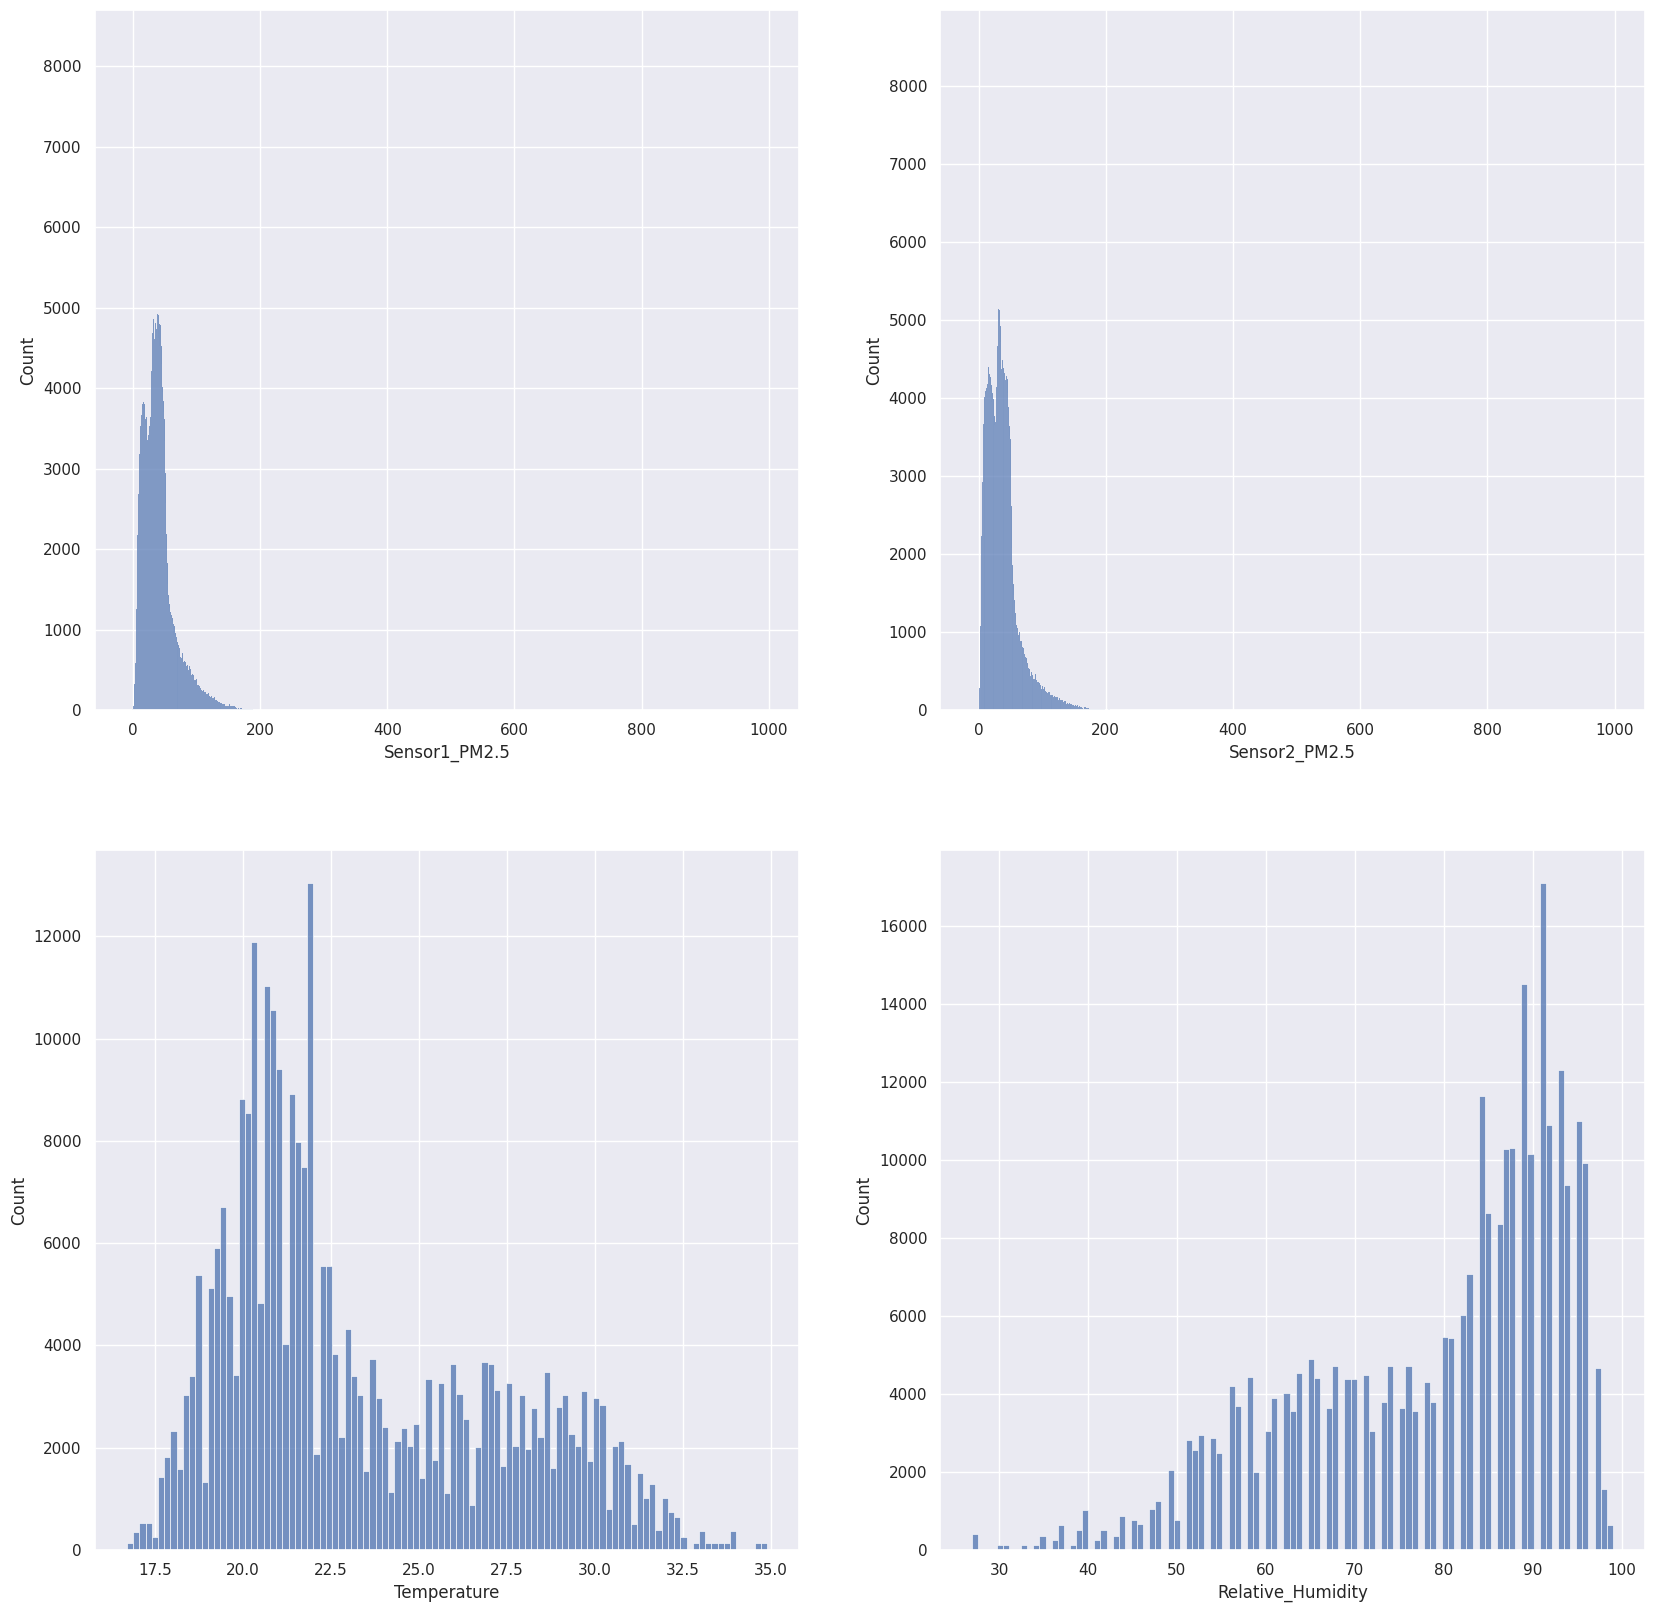

In [ ]:
fig, axes =plt.subplots(nrows=2,ncols=2)
axes = axes.flatten()
fig.set_size_inches(20,20)
for ax ,col in zip(axes,train[nan_cols]):
    sns.histplot(train[col],ax=ax)

In [ ]:
feats = ['Relative_Humidity','Temperature','Sensor1_PM2.5','Sensor2_PM2.5']
for dataset in (train,test):
    dataset[feats] = np.log(dataset[feats]+1)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


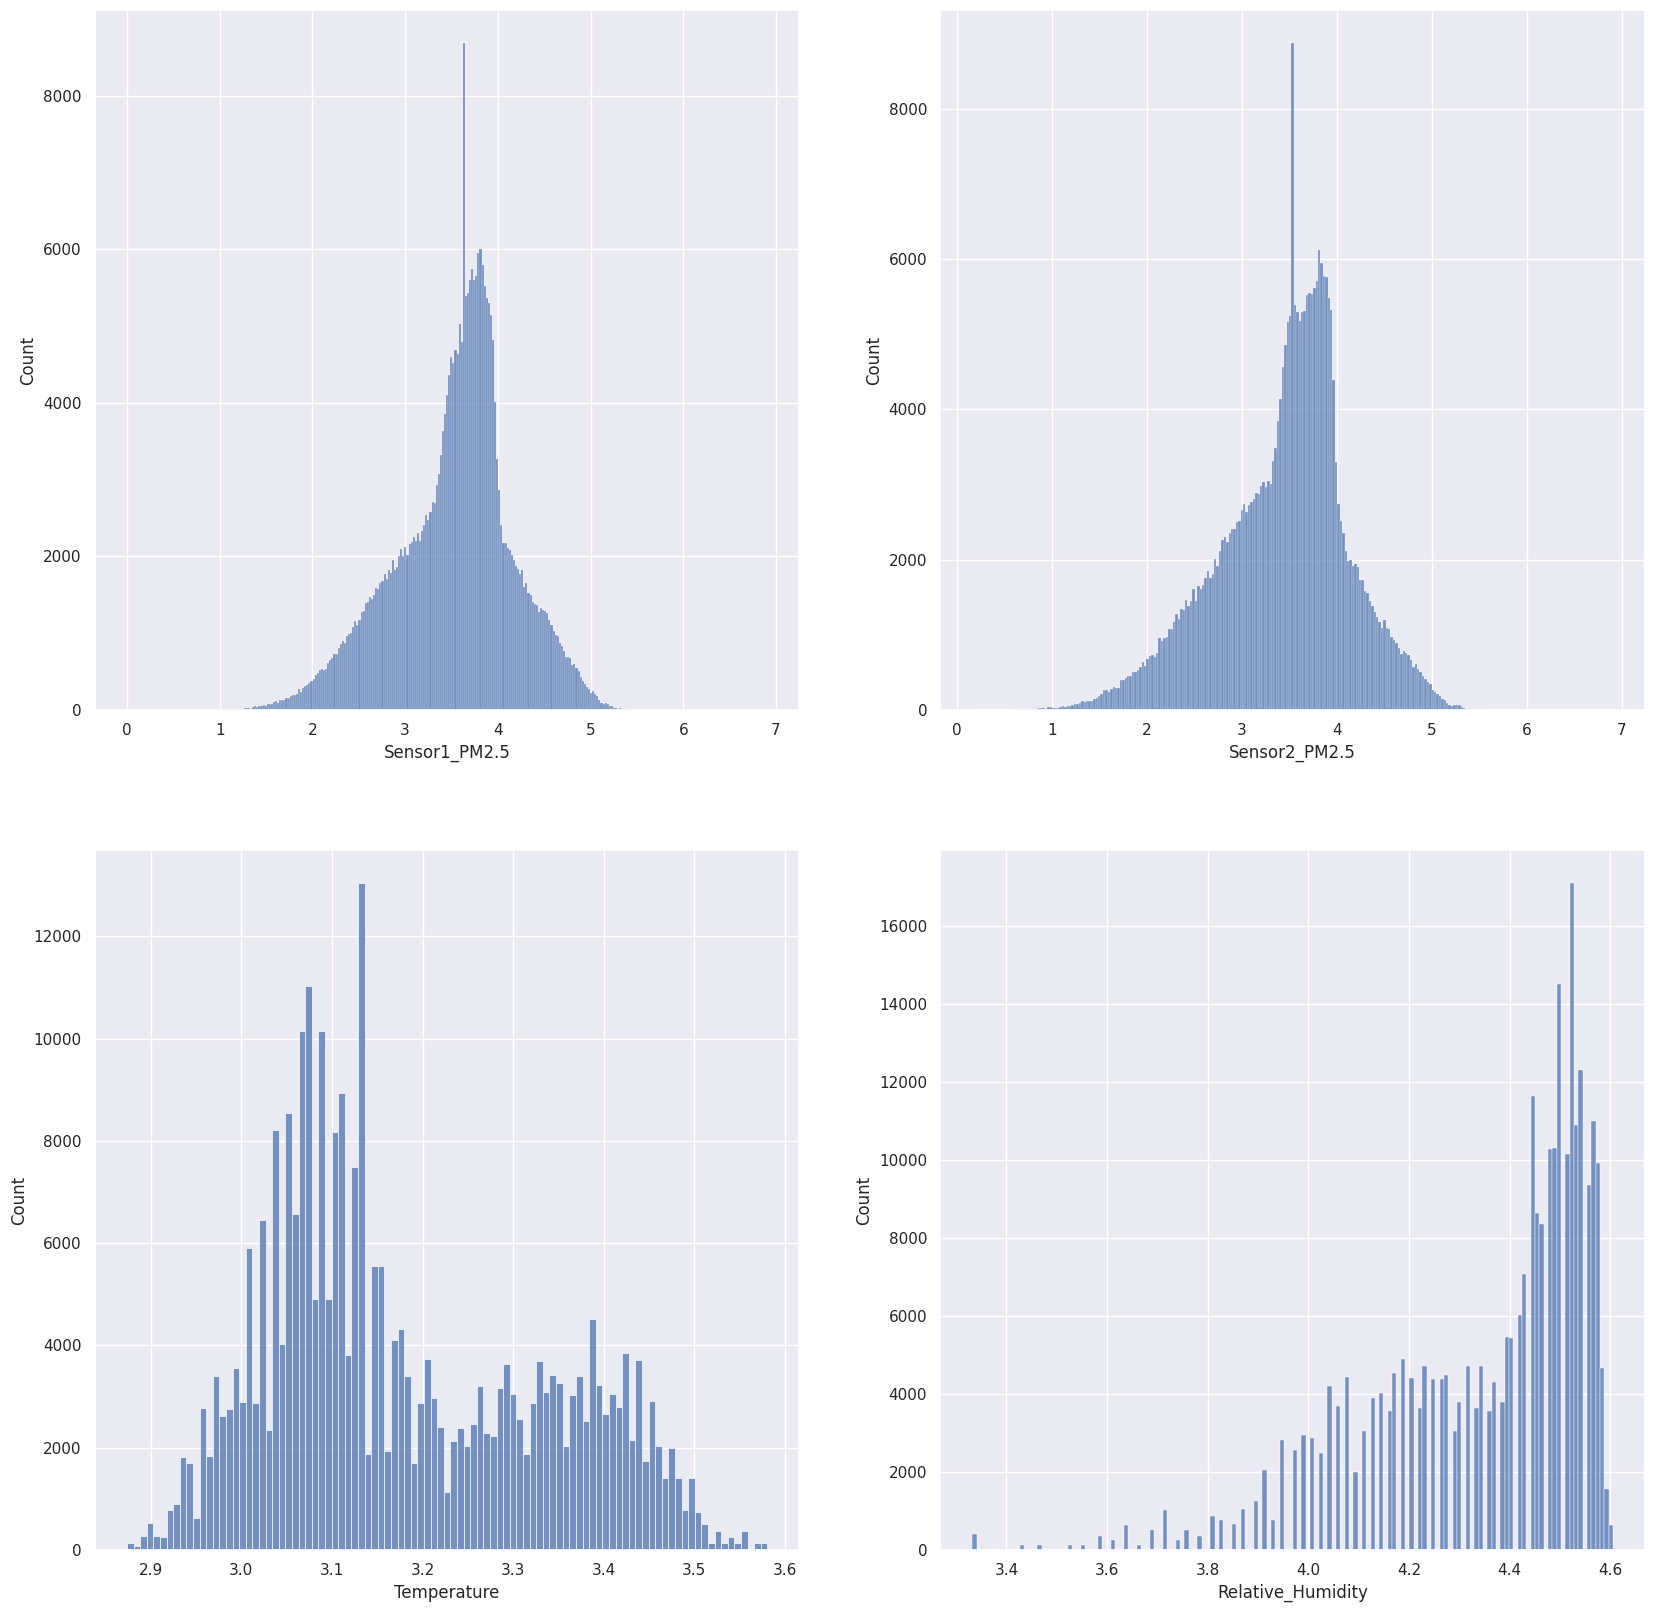

In [ ]:
fig, axes =plt.subplots(nrows=2,ncols=2)
axes = axes.flatten()
fig.set_size_inches(20,20)
for ax ,col in zip(axes,train[nan_cols]):
    sns.histplot(train[col],ax=ax)

In [ ]:
train = train.dropna()
for dataset in (train,test):
    dataset.drop('ID',axis=1,inplace=True)
    dataset["Sensor1_bins"] = pd.cut(dataset["Sensor1_PM2.5"], bins=[-np.inf, 3.0, 3.5, 4.0, np.inf], labels=[1, 2, 3, 4])
    dataset["Sensor2_bins"] = pd.cut(dataset["Sensor2_PM2.5"], bins=[-np.inf, 3.0, 3.5, 4.0, np.inf], labels=[1, 2, 3, 4])
    dataset['S1_S2'] = dataset['Sensor1_PM2.5'] - dataset['Sensor2_PM2.5']
    dataset['IsWeekend?'] = (dataset['Datetime_day'] >= 5)
    dataset['IsHot?'] = dataset['Temperature'] > dataset['Temperature'].mean()

<ipython-input-14-0b148527ca93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('ID',axis=1,inplace=True)
<ipython-input-14-0b148527ca93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Sensor1_bins"] = pd.cut(dataset["Sensor1_PM2.5"], bins=[-np.inf, 3.0, 3.5, 4.0, np.inf], labels=[1, 2, 3, 4])
<ipython-input-14-0b148527ca93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
for cols in ['IsWeekend?','IsHot?']:
  lb = LabelBinarizer()
  train[cols] = lb.fit_transform(train[cols])
  test[cols] = lb.fit_transform(test[cols])

In [ ]:
train.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Datetime_day,Datetime_month,Datetime_year,Datetime_hour,Datetime_minute,Datetime_seconds,Datetime_day_of_year,Datetime_day_of_week,Datetime_week_of_year,S1_S2,IsWeekend?,IsHot?
count,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000,297175.00000,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000,297175.000000
mean,3.537253,3.445902,3.178714,4.358570,0.371068,15.993519,9.069794,2021.207878,11.39467,29.488988,29.495684,261.088544,2.989383,38.453830,0.091351,0.874969,0.400848
std,0.644020,0.694215,0.151521,0.208520,0.483091,8.665813,4.188705,0.405789,6.94356,17.312260,17.323722,129.827445,2.000967,17.748417,0.203762,0.330754,0.490071
min,0.000000,0.165514,2.873565,3.332205,0.000000,1.000000,1.000000,2021.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,-2.984358,0.000000,0.000000
25%,3.163363,3.030134,3.063391,4.234107,0.000000,9.000000,10.000000,2021.000000,5.00000,14.000000,14.000000,292.000000,1.000000,42.000000,-0.021113,1.000000,0.000000
50%,3.623541,3.547316,3.131137,4.442651,0.000000,16.000000,11.000000,2021.000000,11.00000,29.000000,29.000000,317.000000,3.000000,46.000000,0.089671,1.000000,0.000000
75%,3.916413,3.879087,3.306887,4.521789,1.000000,23.000000,12.000000,2021.000000,17.00000,44.000000,44.000000,341.000000,5.000000,49.000000,0.213574,1.000000,1.000000
max,6.906715,6.906014,3.580737,4.605170,1.000000,31.000000,12.000000,2022.000000,23.00000,59.000000,59.000000,365.000000,6.000000,52.000000,2.384781,1.000000,1.000000


In [ ]:
train.Offset_fault.value_counts(normalize=True)

0    0.628932
1    0.371068
Name: Offset_fault, dtype: float64

In [ ]:
train.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Datetime_day,Datetime_month,Datetime_year,Datetime_hour,Datetime_minute,Datetime_seconds,Datetime_day_of_year,Datetime_day_of_week,Datetime_week_of_year,Sensor1_bins,Sensor2_bins,S1_S2,IsWeekend?,IsHot?
0,3.981176,3.922369,2.912351,4.574711,0,3,11,2021,4,6,31,307,2,44,3,3,0.058807,False,False
1,3.590439,3.538057,3.258097,4.330733,0,8,11,2021,18,43,23,312,0,45,3,3,0.052383,True,True
2,3.004692,3.198673,3.254243,4.330733,0,7,11,2021,9,50,33,311,6,44,2,2,-0.193981,True,True
3,3.015535,2.802148,3.254243,4.262680,0,1,1,2022,18,55,15,1,5,52,2,1,0.213387,False,True
4,3.671225,3.577110,3.086487,4.499810,0,5,11,2021,22,23,48,309,4,44,3,3,0.094115,True,False


In [ ]:
train.iloc[227412]

Sensor1_PM2.5               3.279783
Sensor2_PM2.5               3.391147
Temperature                 3.081910
Relative_Humidity           4.442651
Offset_fault                0.000000
Datetime_day                4.000000
Datetime_month             12.000000
Datetime_year            2021.000000
Datetime_hour              15.000000
Datetime_minute            15.000000
Datetime_seconds           38.000000
Datetime_day_of_year      338.000000
Datetime_day_of_week        5.000000
Datetime_week_of_year      48.000000
Sensor1_bins                2.000000
Sensor2_bins                2.000000
S1_S2                      -0.111364
IsWeekend?                  0.000000
IsHot?                      0.000000
Name: 227414, dtype: float64

In [ ]:
X = train.drop('Offset_fault',axis=1)
y = train['Offset_fault']
folds = StratifiedShuffleSplit(n_splits=10,  random_state=2021)
oofs  = np.zeros((len(X)))
test_predictions = np.zeros((len(test)))
#rb = RobustScaler()
#sc = StandardScaler()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    
    X_trn, y_trn = X.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    clf = GradientBoostingClassifier(random_state=42)
    clf.fit(X_trn, y_trn)
    vp = clf.predict(X_val)
    vpt = clf.predict(X_trn)
    oofs[val_idx] = vp
    oofs[trn_idx] = vpt
    val_score = f1_score((vp), (y_val))
    train_score = f1_score((vpt), (y_trn))
    print(4*'-- -- -- --')
    print(f'Fold {fold_+1} Val score: {val_score}')
    print(f'Fold {fold_+1} train score: {train_score}')

    print(4*'-- -- -- --')
    
    tp = clf.predict(test)
    test_predictions += tp / folds.n_splits

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 1 Val score: 0.9140865471663949
Fold 1 train score: 0.9155961087693529
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 2 Val score: 0.9154865649963689
Fold 2 train score: 0.9158235613572822
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 3 Val score: 0.9178293169052365
Fold 3 train score: 0.9151976005113005
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 4 Val score: 0.9164142669861217
Fold 4 train score: 0.9152528732741494
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 5 Val score: 0.9159827703468602
Fold 5 train score: 0.9150577402068081
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 6 Val score: 0.9172544763971785
Fold 6 train score: 0.9150357707052513
-- -- -- ---- -- -- ---- -- -- ---- -- -- --
-- -

In [ ]:
ss.Offset_fault = tp
ss.to_csv('1st_umoja.csv', index = False)

In [ ]:
ss.Offset_fault = [1 if x >= 0.5 else 0 for x in test_predictions]
ss.to_csv('2nd_umoja.csv', index = False)